<h3 style="color:green;">
Data Cleaning:<br>
    ----  Data type correction<br>
----    Missing value imputation<br>
----     Outlier detection and handling<br>
Descriptive Statistics:<br>
 ----    Measures of central tendency<br>
   ----  Measures of variability<br>
    ---- Measures of distribution<br>
    ---- Skewness and kurtosis<br>
Data Visualization:<br>
    ---- Graphs (bar, line, scatter, etc.)<br>
    ---- Charts (pie, doughnut, etc.)<br>
    ---- Histograms<br>
    ---- Box plots<br>
   ----  Correlation Analysis:<br>
   ----  Correlation coefficients<br>
   ----  Multicollinearity<br>
Dimensionality Reduction:<br>
  ----   Principal Component Analysis (PCA)<br>
 ----    t-Distributed Stochastic Neighbor Embedding (t-SNE)<br>
 ----    Feature Engineering:<br>
 ----    Creating new features<br>
 ----    Extracting date/time features<br>
 ----    Creating binary indicators<br>
Hypothesis Testing:<br>
 ----    Normality testing<br>
 ----    Mean and variance testing<br>
 ----    Goodness of fit testing<br>
Data Transformation:<br>
 ----    Log transformation<br>
 ----    Box-Cox transformation<br>
----     Normalization and standardization<br>
Time Series Analysis:<br>
----     Seasonality and trends<br>
----     Autocorrelation<br>
 ----    Time series forecasting<br>
Text Analytics:<br>
 ----    Sentiment analysis<br>
 ----    Topic modeling<br>
 ----    Text preprocessing<br>
</h3>



<h3 style="color:black;">
some Kaggle datasets that can be used for the mentioned tasks:<br>

Data Cleaning:<br>


Wine Reviews (https://www.kaggle.com/zynicide/wine-reviews)<br>
    
    
Descriptive Statistics:<br>


Google Play Store Apps (https://www.kaggle.com/lava18/google-play-store-apps)<br>
    
    
Data Visualization:<br>

Indian Premier League (IPL) (https://www.kaggle.com/manasgarg/ipl)<br>
    
    
Dimensionality Reduction:<br>


Credit Card Fraud Detection (https://www.kaggle.com/mlg-ulb/creditcardfraud)<br>
    
    
    
Hypothesis Testing:<br>


Advertising dataset (https://www.kaggle.com/ashydv/advertising-dataset)<br>

    
    
Data Transformation:<br>


Advertising dataset (https://www.kaggle.com/ashydv/advertising-dataset)<br>

    
    
Time Series Analysis:<br>

Bitcoin Historical Data (https://www.kaggle.com/mczielinski/bitcoin-historical-data)<br>

    
    
Text Analytics:<br>


SMS Spam Collection Dataset (https://www.kaggle.com/uciml/sms-spam-collection-dataset)<br>

</h3>

# Importing Importatnt Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset overview

In [2]:
df=pd.read_csv("winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


# 1.Data Cleaning

## Imputing Missing Vlaues

In [4]:
# Find the total number of missing values from the entire dataset
print(df.isnull().sum())

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [5]:
# Dealing with price column
x=df["price"].mean()
df["price"]=df["price"].fillna(x)

### Dealing with column [ country, province,variety]

In [6]:
# from 129971 nmumbers of rows 63 is negligible hence we can drop these rows
df.dropna(subset=['country','province','variety'], inplace=True)

### Dealing with [[designation,region_1,region_2,taster_name,taster_twitter_handle]: Object]

In [7]:
# Filling object type columns with theie Previous value:
l=["designation","region_1","region_2","taster_name","taster_twitter_handle"]
for col in l:
    df[col]=df[col].fillna(method ='pad')

In [8]:
df.shape

(129907, 14)

In [9]:
df.dropna(inplace=True)

In [10]:
print(df.isnull().sum())

Unnamed: 0               0
country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64


## Datatype correction

---- converting price to float<br>

In [11]:
df["price"]=df["price"].astype(int)

In [12]:
df.shape


(129905, 14)

## Outlier Detection

Outlier detection and handling: We can use various statistical techniques to detect outliers in the dataset.<br>
<h3 style="color: red">
    
Z score Method: <br>
    
One common technique is to use the z-score to identify data points that are more than 3 standard deviations away from the mean. We can then handle these outliers by removing them or replacing them with more appropriate values.<br>


    
Inter quartile range (IQR) method: <br>
    
Each dataset can be divided into quartiles. The first quartile point indicates that 25% of the data points are below that value whereas second quartile is considered as median point of the dataset. The inter quartile method finds the outliers on numerical datasets by following the procedure below
Find the first quartile, Q1.
Find the third quartile, Q3.
Calculate the IQR. IQR= Q3-Q1.
Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
Any data point outside this range is considered as outlier and should be removed for further analysis.
The concept of quartiles and IQR can best be visualized from the boxplot. It has the minimum and maximum point defined as Q1–1.5*IQR and Q3+1.5*IQR respectively. Any point outside this range is outlier.
</h3>


###  1.1 Z Score Method :
    Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

    Z score = (x -mean) / std. deviation

    A normal distribution is shown below and it is estimated that
    68% of the data points lie between +/- 1 standard deviation.
    95% of the data points lie between +/- 2 standard deviation
    99.7% of the data points lie between +/- 3 standard deviation



### Calculating Z Score for price

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

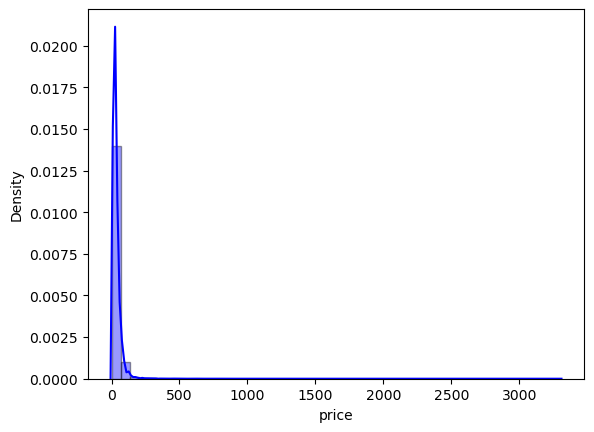

In [13]:
sns.distplot(df["price"], hist=True, kde=True, 
              color = 'blue',
             hist_kws={'edgecolor':'black'})

In [14]:
df['z_score_price']=df['price'] - (df['price'].mean())/df['price'].std()
df["z_score_price"]

2         13.107174
3         12.107174
4         64.107174
5         14.107174
6         15.107174
            ...    
129966    27.107174
129967    74.107174
129968    29.107174
129969    31.107174
129970    20.107174
Name: z_score_price, Length: 129905, dtype: float64

In [15]:
df_scores_filtered=df[(df['z_score_price']>-3) & (df['z_score_price']<3)]

print(df_scores_filtered)

Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, region_2, taster_name, taster_twitter_handle, title, variety, winery, z_score_price]
Index: []


### Z score for Point Column

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points', ylabel='Density'>

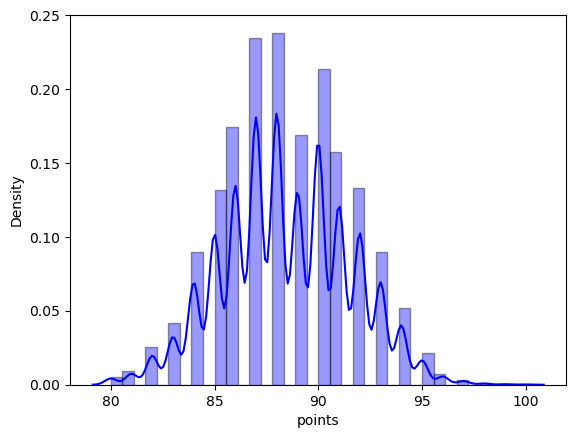

In [16]:
sns.distplot(df["points"], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [17]:
df['z_score_point']=df['points'] - (df['points'].mean())/df['points'].std()
df["z_score_point"]

2         57.906483
3         57.906483
4         57.906483
5         57.906483
6         57.906483
            ...    
129966    60.906483
129967    60.906483
129968    60.906483
129969    60.906483
129970    60.906483
Name: z_score_point, Length: 129905, dtype: float64

In [18]:
df_scores_point_filtered=df[(df['z_score_point']>-3) & (df['z_score_point']<3)]

print(df_scores_point_filtered)

Empty DataFrame
Columns: [Unnamed: 0, country, description, designation, points, price, province, region_1, region_2, taster_name, taster_twitter_handle, title, variety, winery, z_score_price, z_score_point]
Index: []


<h3 style="color: blue"> After Calculating Z Score we found that there is no outlier for column price and points

# 2. Descriptive Statistics

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<h3 style="color: red">--> lets take Rating column for measuring stats</h3><br>

##  Measures of central tendency:<br>

The measures of central tendency describe the typical or average values of a dataset. There are three commonly used measures of central tendency: the mean, the median, and the mode. Let's calculate these for the "Rating" column in the dataset:

### Calculate the mean, median, and mode of the "Rating" column

In [21]:
mean_rating = df["Rating"].mean()
median_rating = df["Rating"].median()
mode_rating = df["Rating"].mode()[0]

# Print the results
print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)

Mean Rating: 4.193338315362448
Median Rating: 4.3
Mode Rating: 4.4


## Measures of variability:
The measures of variability describe how spread out the data is. There are several measures of variability, including the range, the variance, and the standard deviation. Let's calculate these for the "Rating" column:

### Calculate the range, variance, and standard deviation of the "Rating" column
--------  Range=max-min
--------  Variance=

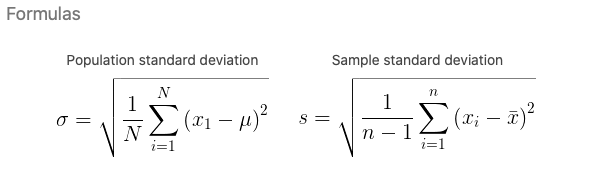

In [22]:
from IPython import display
display.Image("formula.png")

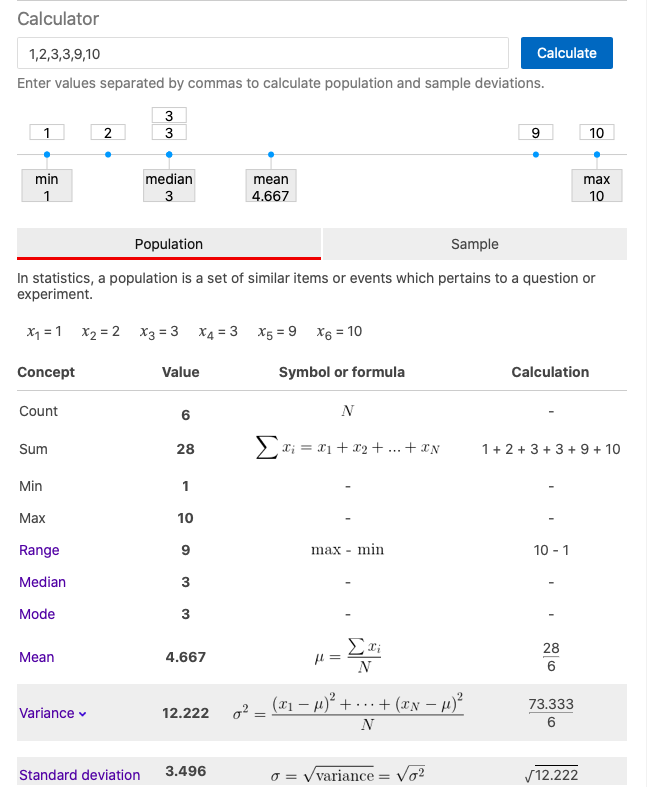

In [23]:
display.Image("variance and sd.png")

In [24]:
range_rating = df["Rating"].max() - df["Rating"].min()
variance_rating = df["Rating"].var()
std_rating = df["Rating"].std()
# Print the results
print("Range of Ratings:", range_rating)
print("Variance of Ratings:", variance_rating)
print("Standard Deviation of Ratings:", std_rating)

Range of Ratings: 18.0
Variance of Ratings: 0.28883240560309886
Standard Deviation of Ratings: 0.5374313031477594


## Measures of distribution:
The measures of distribution describe the shape of the data. There are several measures of distribution, including the skewness and kurtosis. 

<h3>Skewness</h3> measures how skewed the data is. A skewness value of 0 indicates a perfectly symmetrical distribution, while a positive value indicates a right-skewed distribution and a negative value indicates a left-skewed distribution. In this case, the skewness of the "Rating" column is slightly left-skewed (-0.68).

<h3> Kurtosis</h3> measures how peaked or flat the data is. A kurtosis value of 0 indicates a normal distribution, while a positive value indicates a more peaked distribution (leptokurtic) and a negative value indicates a more flat distribution (platykurtic). In this case, the kurtosis of the "Rating" column is slightly platykurtic (-1.23).


<h3>-->Let's calculate these for the "Rating" column:



### Calculate the skewness and kurtosis of the "Rating" column

In [25]:
skewness_rating = df["Rating"].skew()
kurtosis_rating = df["Rating"].kurt()

# Print the results
print("Skewness of Ratings:", skewness_rating)
print("Kurtosis of Ratings:", kurtosis_rating)

Skewness of Ratings: 0.5956367473804342
Kurtosis of Ratings: 65.99478130826435


# 3. Data Visulization

In [26]:
ipl_df1 = pd.read_csv('ipl_data/IPL_Matches_2008_2022.csv')
ipl_df2=pd.read_csv('ipl_data/IPL_Ball_by_Ball_2008_2022.csv')
ipl_df = pd.merge(ipl_df1, ipl_df2, on="ID")
ipl_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


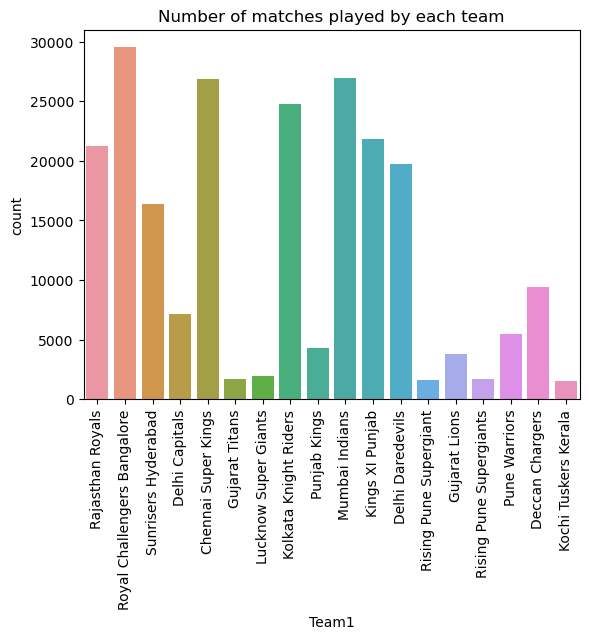

In [27]:
# Bar chart of the number of matches played by each team
sns.countplot(x='Team1', data=ipl_df)
plt.xticks(rotation=90)
plt.title('Number of matches played by each team')
plt.show()

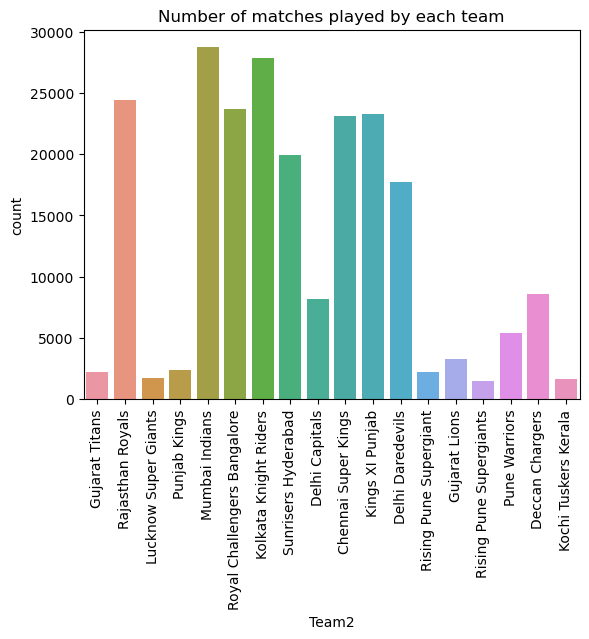

In [28]:
# Bar chart of the number of matches played by each team
sns.countplot(x='Team2', data=ipl_df)
plt.xticks(rotation=90)
plt.title('Number of matches played by each team')
plt.show()

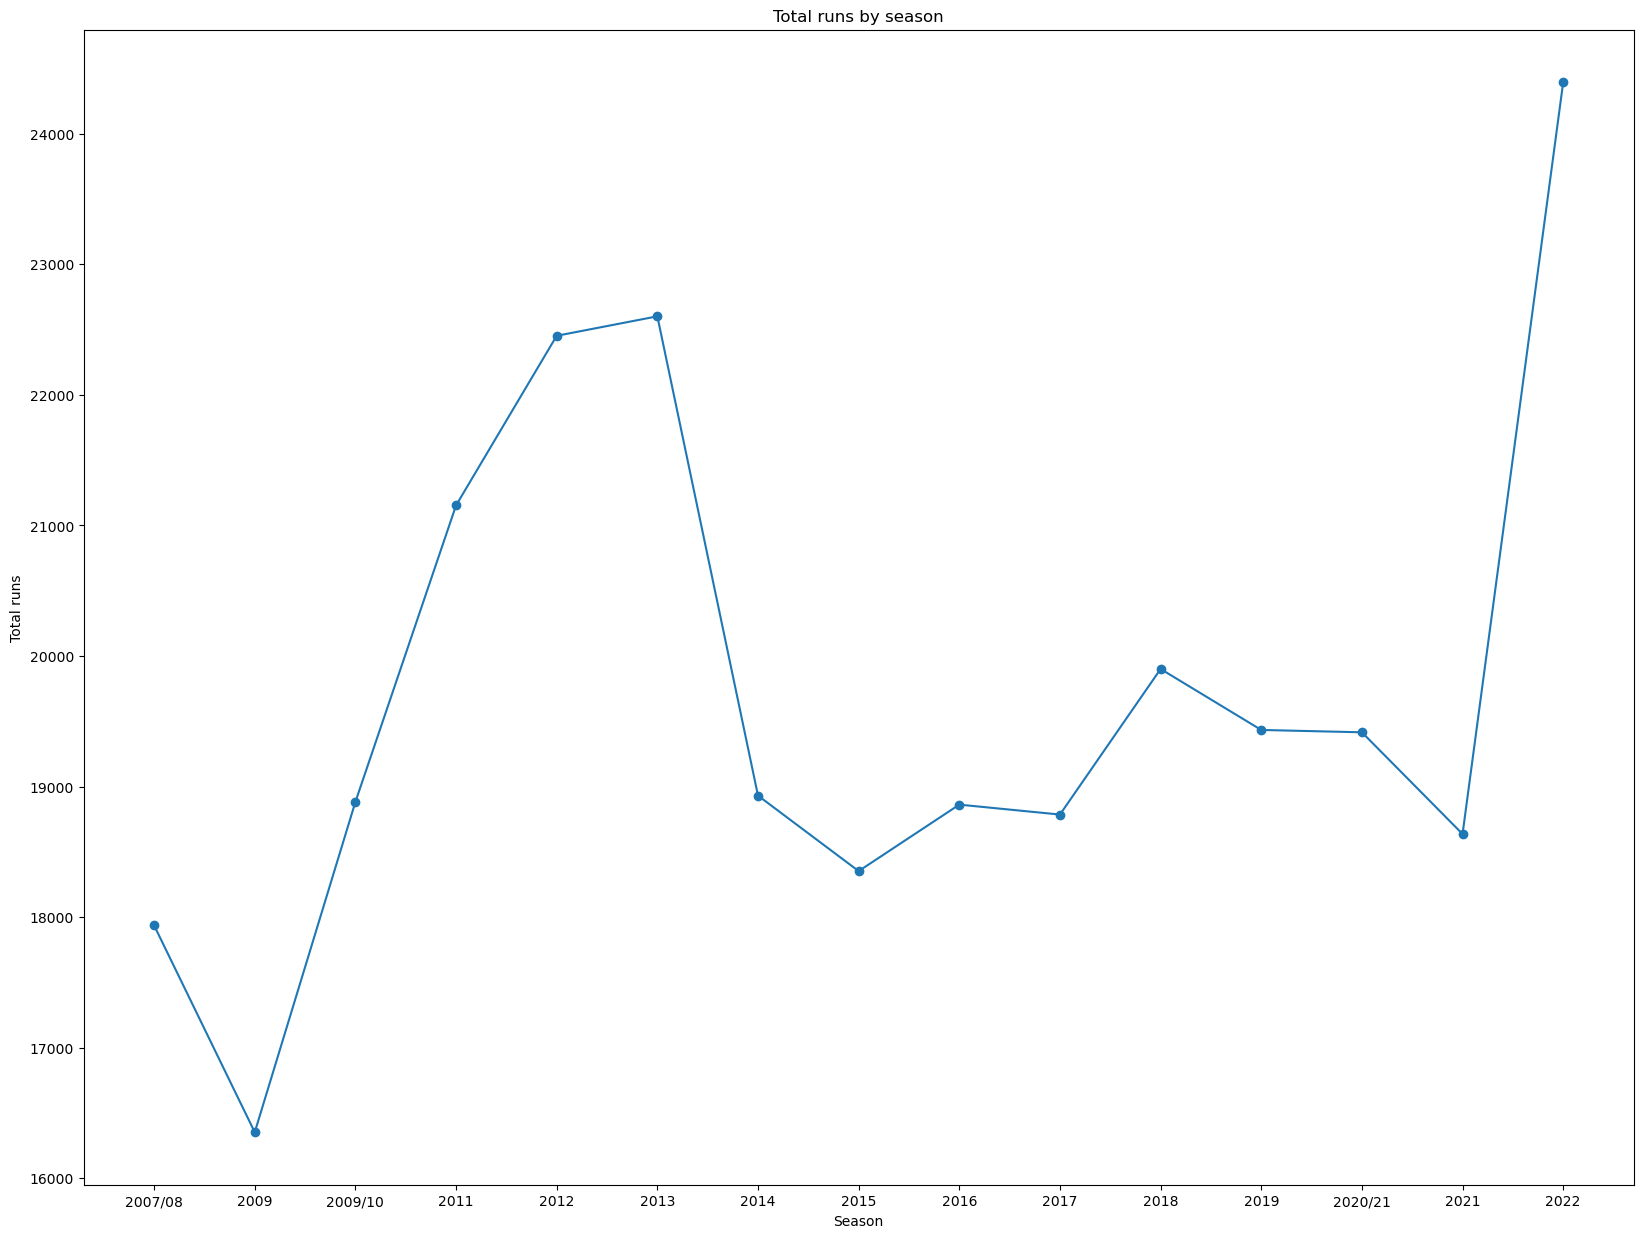

In [29]:
# Line graph of total runs by each season
fig, ax = plt.subplots(figsize=(20, 15))
total_runs = ipl_df.groupby('Season')['total_run'].sum()
plt.plot(total_runs.index, total_runs.values, marker='o')
plt.title('Total runs by season')
plt.xlabel('Season')
plt.ylabel('Total runs')
plt.show()

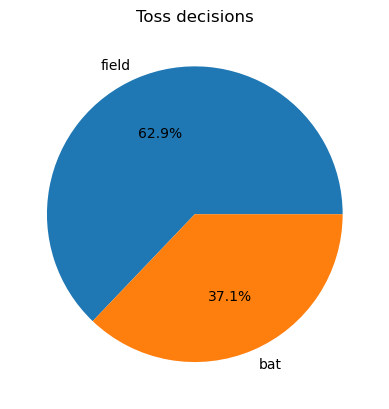

In [30]:
# Pie chart of toss decisions
toss_decision = ipl_df['TossDecision'].value_counts()
plt.pie(toss_decision, labels=toss_decision.index, autopct='%1.1f%%')
plt.title('Toss decisions')
plt.show()

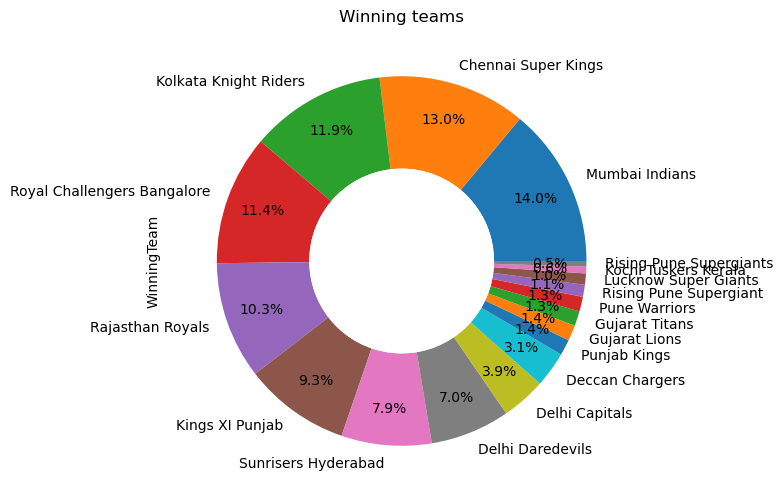

In [31]:
# Donut chart of winning teams
plt.figure(figsize=(6,6))
ipl_df["WinningTeam"].value_counts().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1, wedgeprops=dict(width=0.5))
circle = plt.Circle(xy=(0,0), radius=0.5, facecolor='white')
plt.gca().add_artist(circle)
plt.title('Winning teams')
plt.show()

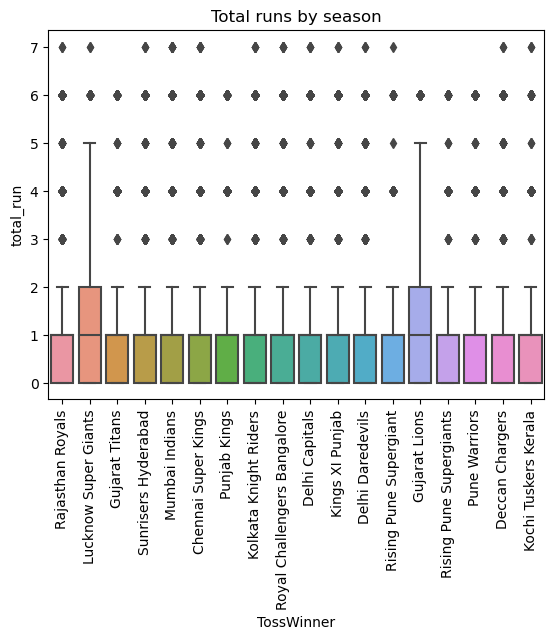

In [32]:
# Box plot of total runs by each season
sns.boxplot(data=ipl_df,x='TossWinner', y='total_run')
plt.title('Total runs by season')
plt.xticks(rotation=90)
plt.show()

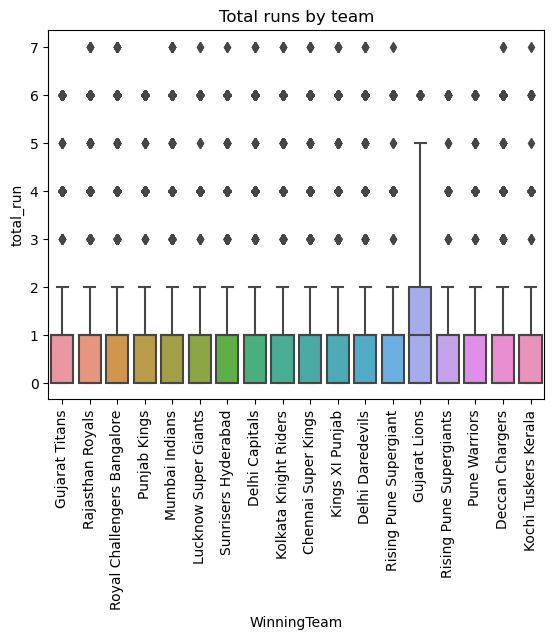

In [33]:
# Box plot of total runs by each team
sns.boxplot(x='WinningTeam', y='total_run', data=ipl_df)
plt.title('Total runs by team')
plt.xticks(rotation=90)
plt.show()

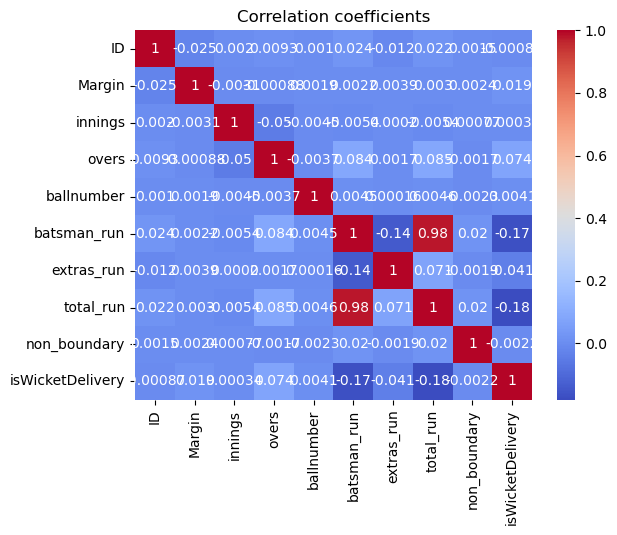

In [34]:
# Correlation coefficients between numerical variables
corr = ipl_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation coefficients')
plt.show()

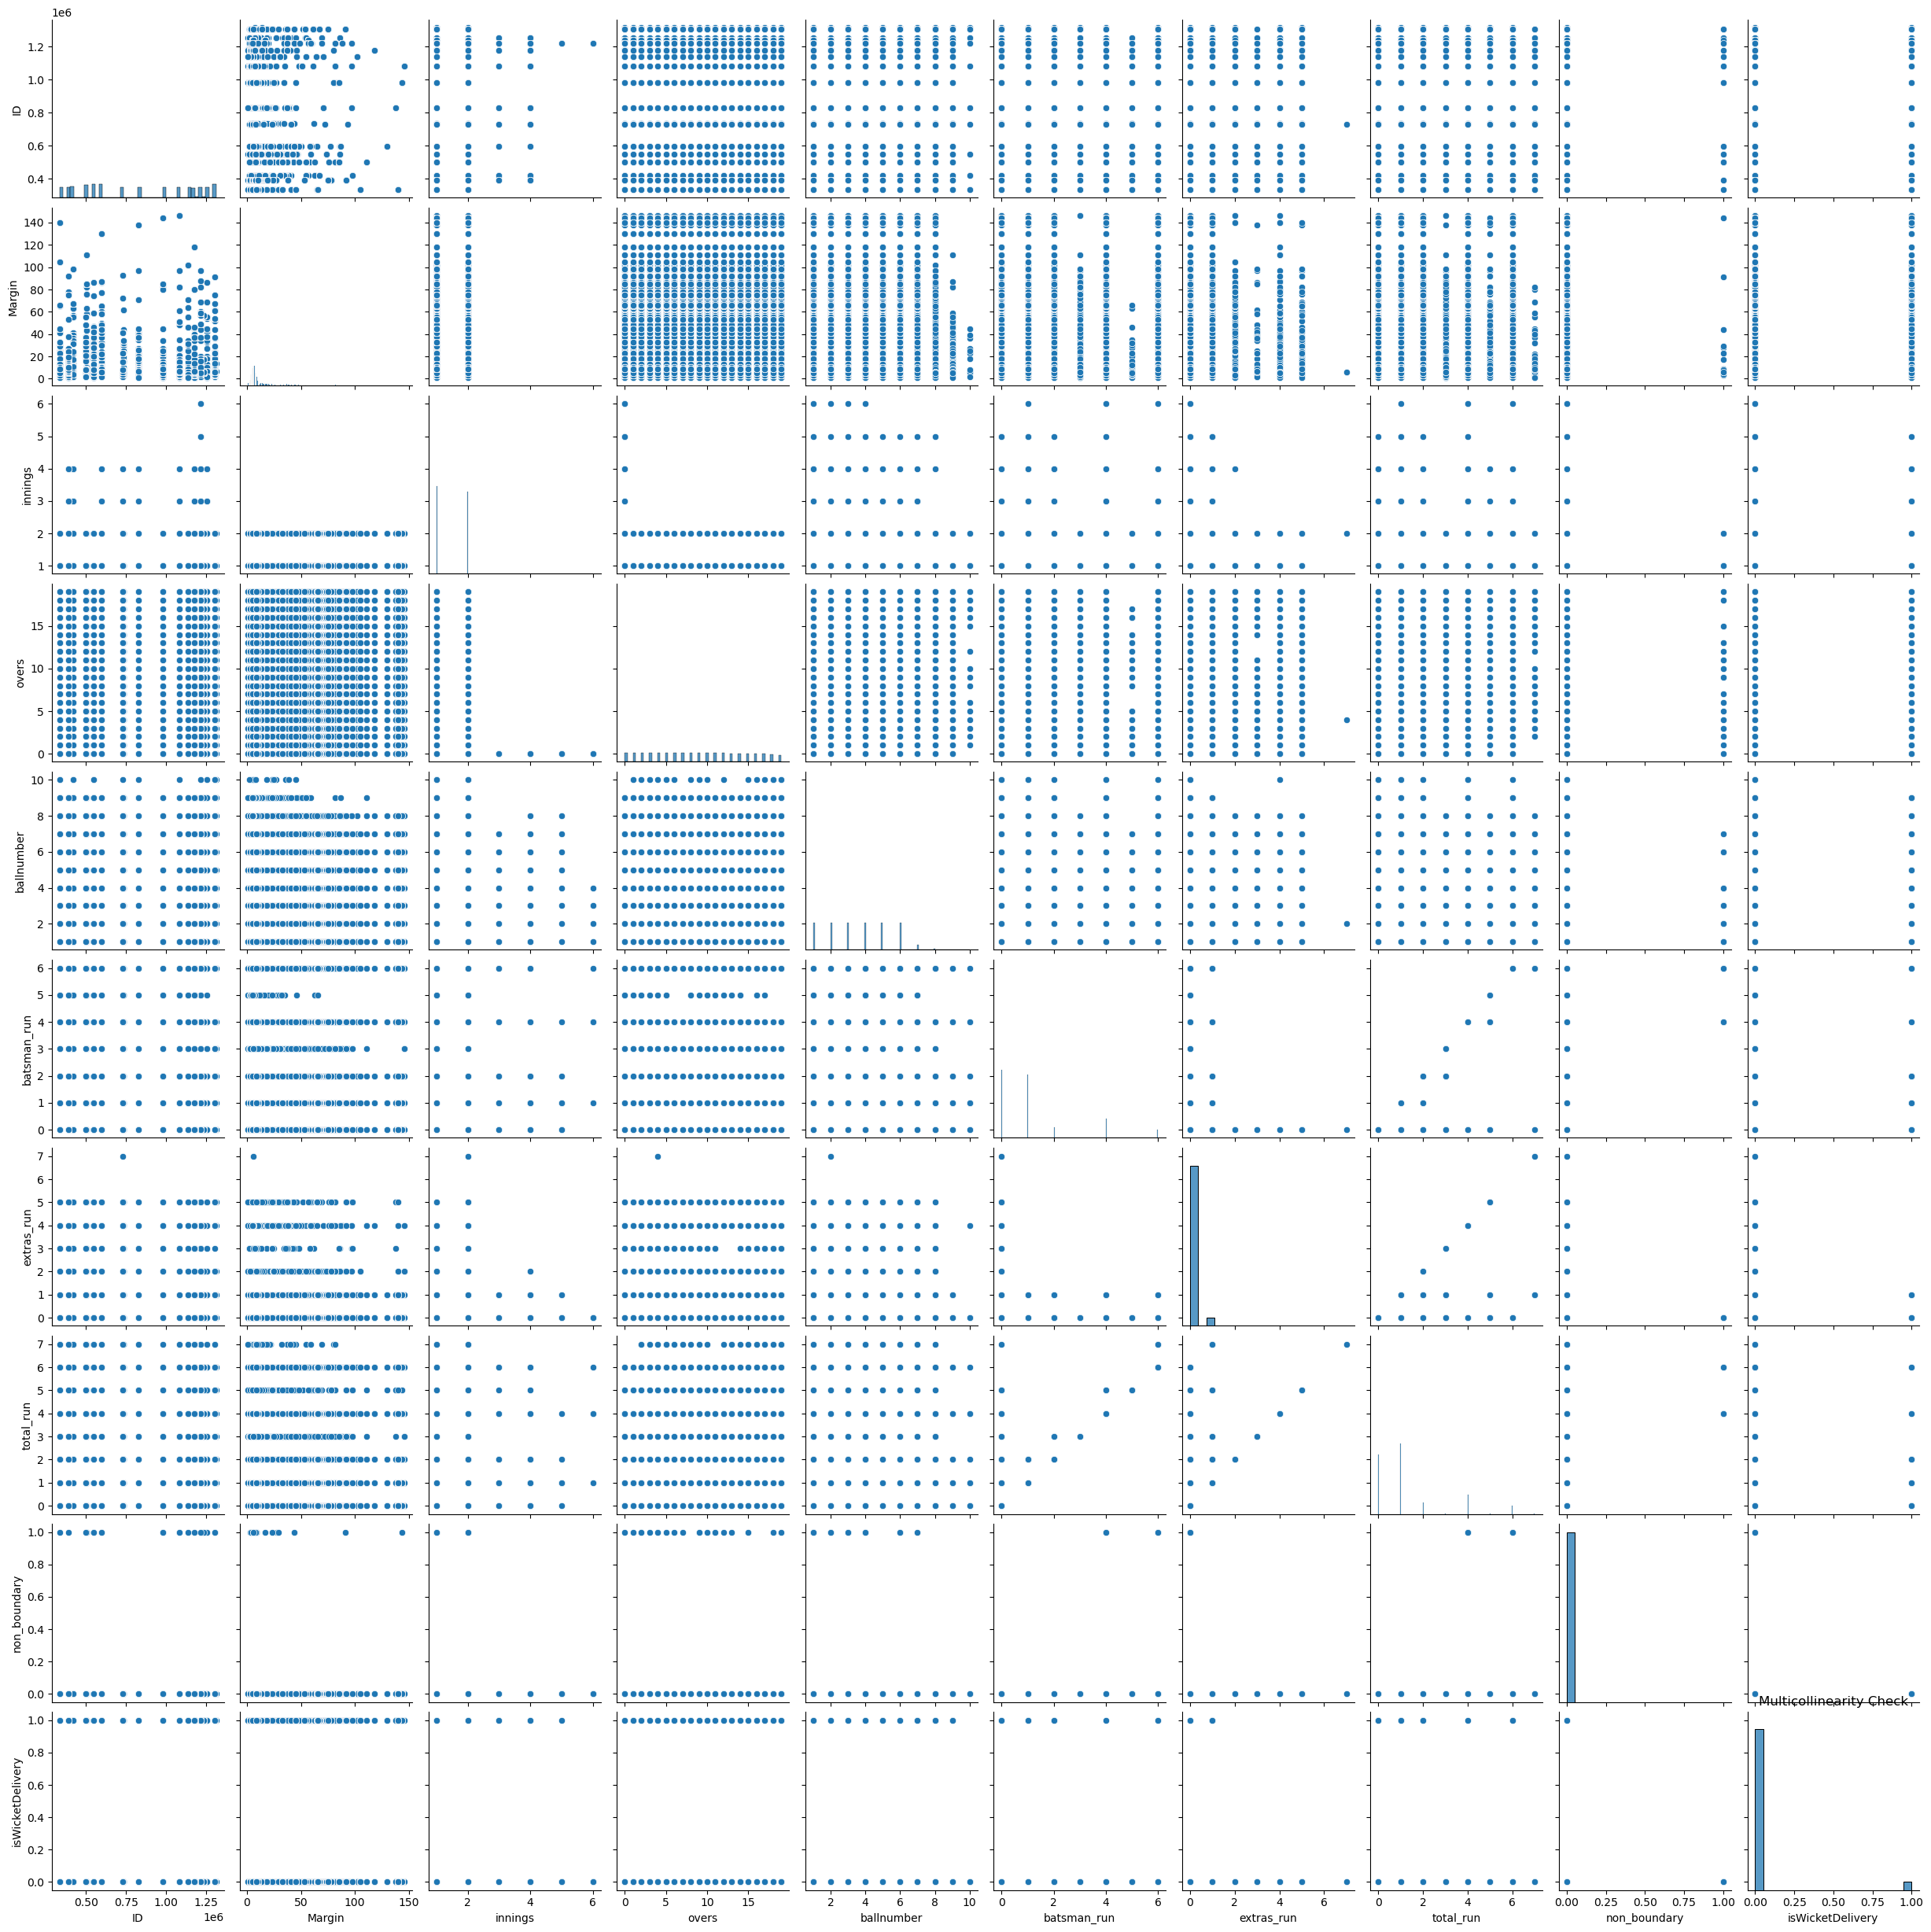

In [35]:
# Multicollinearity check
sns.pairplot(ipl_df)
plt.title('Multicollinearity Check')
plt.show()

# 4.Dimensionality Reduction:

<h3 style="color: red">
----    For the PCA and t-SNE algorithms, we first standardize the features to ensure that each feature has zero mean and unit variance, which is a common pre-processing step for dimensionality reduction techniques. We also specify the number of components for PCA and the perplexity parameter for t-SNE.<br>

----For feature engineering, we create new features based on the existing features, extract date/time features from the 'Time' column, and create binary indicators based on certain criteria. This is just an example and there are many other ways to engineer features depending on the specific problem at hand.

In [38]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the credit card fraud dataset
df = pd.read_csv('creditcard.csv')
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Separate the features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Perform standardization on the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [ ]:

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
X_pca

array([[ 0.41671307, -2.55024061],
       [-0.39329618, -2.07147634],
       [ 1.87571491, -2.59871302],
       ...,
       [-0.18594545,  2.05023934],
       [-0.4611416 ,  1.1950762 ],
       [ 0.77509595,  1.85346588]])

In [ ]:
# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_std)

In [ ]:
# Feature engineering: create new features
df['Amount_Log'] = np.log(df['Amount'] + 0.01)
df['Amount_Squared'] = np.square(df['Amount'])

In [ ]:
# Feature engineering: extract date/time features
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Time'].dt.day
df['Weekday'] = df['Time'].dt.weekday

In [ ]:
# Feature engineering: create binary indicators
df['Is_High_Amount'] = np.where(df['Amount'] > 500, 1, 0)
df['Is_Weekend'] = np.where(df['Weekday'].isin([5, 6]), 1, 0)

# 5.Hypothesis Testing

<h3>This code performs the following hypothesis tests:<br>
    
---- Normality test on the 'Sales' column using the normaltest function from scipy.stats.
Mean and variance test on the 'TV' column using the mean and var functions from numpy.
Goodness of fit test on the 'Radio' column using the norm function from scipy.stats to generate the normal distribution and the qqplot function from statsmodels.api to create a QQ-plot.

In [ ]:
from scipy import stats
import statsmodels.api as sm


ad_df=pd.read_csv("advertising.csv")
ad_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Normality test on the 'Sales' column
sales = ad_df['Sales']
print(stats.normaltest(sales))

NormaltestResult(statistic=7.100749912891184, pvalue=0.0287138711844335)


In [ ]:
# Mean and variance test on the 'TV' column
tv = ad_df['TV']
mean = tv.mean()
variance = tv.var()
print("Mean:", mean, "Variance:", variance)

Mean: 147.0425 Variance: 7370.949893216087


<h3>What is the goodness of fit?<br>

    A goodness-of-fit is a statistical technique. It is applied to measure “how well the actual(observed) data points fit into a Machine Learning model”. It summarizes the divergence between actual observed data points and expected data points in context to a statistical or Machine Learning model.

    Assessment of divergence between the observed data points and model-predicted data points is critical to understand, a decision made on poorly fitting models might be badly misleading. A seasoned practitioner must examine the fitment of actual and model-predicted data points. <br>
    
Q-Q-Plot: <br>
    
    The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution. or 
    
    A Q-Q plot, short for “quantile-quantile” plot, is used to assess whether or not a set of data potentially came from some theoretical distribution. In most cases, this type of plot is used to determine whether or not a set of data follows a normal distribution

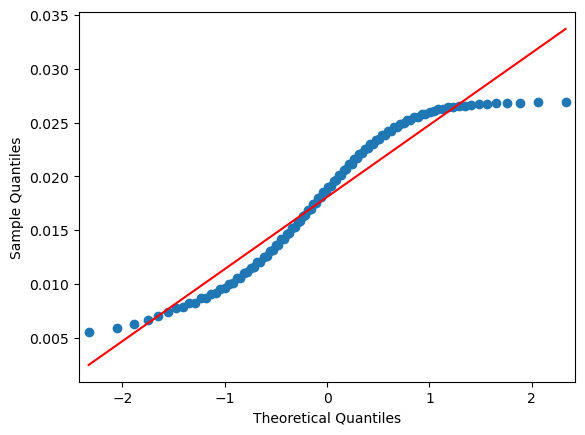

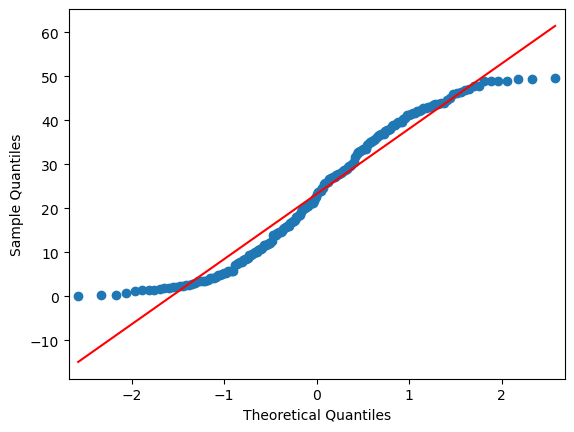

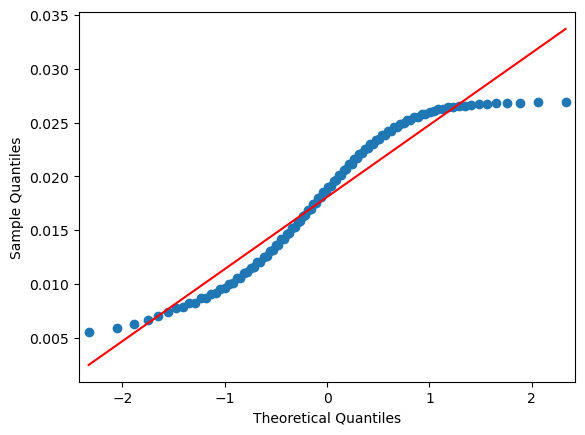

In [ ]:
# Goodness of fit test on the 'Radio' column
radio = ad_df['Radio']
x = np.linspace(radio.min(), radio.max(), 100)
pdf = stats.norm.pdf(x, loc=radio.mean(), scale=radio.std())
sm.qqplot(radio, line='s')
sm.qqplot(pdf, line='s')

# 6.Data Transformation:

<h3> BoxCox:<br>
    
    
    Box-Cox transformation is a statistical technique that transforms your target variable so that your data closely resembles a normal distribution. In many statistical techniques, we assume that the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis tests

In [ ]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the advertising dataset
data = pd.read_csv('advertising.csv')

# Log transformation of the 'Sales' column
data['Sales'] = np.log(data['Sales'])

# Box-Cox transformation of the 'TV' column
data['TV'], _ = boxcox(data['TV'])

# Normalization of the 'Radio' column
scaler = MinMaxScaler()
data['Radio'] = scaler.fit_transform(data[['Radio']])

# Standardization of the 'Newspaper' column
scaler = StandardScaler()
data['Newspaper'] = scaler.fit_transform(data[['Newspaper']])

# Display the transformed data
print(data.head())

          TV     Radio  Newspaper     Sales
0  70.230461  0.762097   1.778945  3.095578
1  20.323362  0.792339   0.669579  2.341806
2   9.499797  0.925403   1.783549  2.484907
3  51.476164  0.832661   1.286405  2.803360
4  58.721859  0.217742   1.281802  2.884801
